## a-AlphaBio homework 
### Run inference with some of the trained models
### Mark Thompson
### Started April 29, 2024 

In [1]:
%load_ext autoreload

In [2]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline


---------
### Holdout dataset

In [3]:
# The holdout data
data_file = './data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

holdout dataframe has 30071 rows
['description_a', 'sequence_a', 'description_alpha', 'sequence_alpha']
count                                                 30071
unique                                                29971
top       QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...
freq                                                    101
Name: sequence_a, dtype: object


In [4]:
import torch
import torch.nn as nn

# Some plotting functions
#
def plot_preds_hist(preds_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    print('len(preds):', len(preds))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Histogram of predicted values
    plt.hist(preds, bins=100)
    plt.xlabel('pred Kd (nm)')
    plt.ylabel('count')
    plt.title('Distribution of pred values on holdout set')
    plt.show()


def plot_pred_vs_true(preds_file_path, true_file_path, xlim=(0,5), ylim=(0,5)):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    y = [a[0] for a in y]

    # scatter plot of true vs pred
    plt.scatter(y, preds, c ="blue")
    plt.xlabel('experimental Kd (nm)')
    plt.ylabel('predicted Kd (nm)')
    plt.title('true vs predicted Kd on validation set')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

# Some error values
def print_errors(preds_file_path, true_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    y = [a[0] for a in y]

    # RMSE
    rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
    print('rmse:', rmse)

    # MSE
    mse = np.mean((np.array(y) - np.array(preds))**2)
    print('mse:', mse)

    mse2 = nn.MSELoss()(torch.tensor(preds), torch.tensor(y))
    print('mse2:', mse2)

    # MAE
    mae = np.mean(np.abs(np.array(y) - np.array(preds)))
    print('mae:', mae) 

    # Mean and standard deviation of the error
    mean = np.mean(np.array(y) - np.array(preds))
    std = np.std(np.array(y) - np.array(preds))
    print('Error: mean:', mean, ', std:', std)

    # Mean of the absolute percentage error
    mape = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y))
    print('mape:', mape)

    # Median of the absolute percentage error
    mdape = np.median(np.abs(np.array(y) - np.array(preds))/np.array(y))
    print('mdape:', mdape)

    # PPE10: percentage of time the prediction is within 10 percent of the ground truth
    ppe10 = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y) < 0.1)
    print('ppe10:', ppe10)

    # PPE20: percentage of time the prediction is within 10 percent of the ground truth
    ppe20 = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y) < 0.2)
    print('ppe20:', ppe20)

    


----
### MLP model

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 925 , len(y): 925
rmse: 0.6193532730095538
mse: 0.38359847678764686
mse2: tensor(0.3836)
mae: 0.5123347219260963
Error: mean: 0.02429874768128266 , std: 0.6188764397266777
mape: 0.36113598366285143
mdape: 0.2123920597816913
ppe10: 0.23243243243243245
ppe20: 0.4627027027027027
len(preds): 925 , len(y): 925


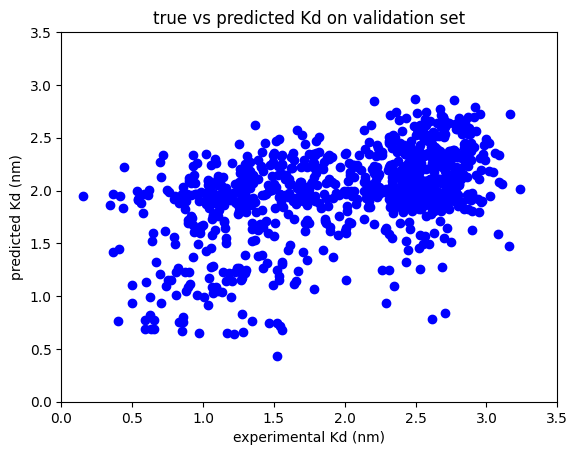

In [7]:
pred_file_path = './inference_results/mlp_model/cleaned-3/preds_mlp_1714946467.902522.pkl'
true_file_path = './inference_results/mlp_model/cleaned-3/y_mlp_1714946467.9027646.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

----
### Dense MLP model

In [ ]:
pred_file_path = './inference_results/preds_dense_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/preds_dense_mlp_1714520055.8448465.pkl'
true_file_path = './inference_results/y_dense_mlp_1714520055.845317.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP Clean-3 Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/residual_mlp_model/cleaned-3/preds_residual_mlp_1714945823.4635217.pkl'
true_file_path = './inference_results/residual_mlp_model/cleaned-3/y_residual_mlp_1714945823.4637432.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

-------
### Vision Transform Model (VIT)  1-channel Clean-3 Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/vit_model/cleaned-3/BW/preds_vit_1714868230.7190938.pkl'
true_file_path = './inference_results/vit_model/cleaned-3/BW/y_vit_1714868230.7193077.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))


----
### Vision Transformer 3-channel,  Clean-3 Dataset

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/vit_model/cleaned-3/BGR/preds_vit_1714883259.9500844.pkl'
true_file_path = './inference_results/vit_model/cleaned-3/BGR/y_vit_1714883259.9503129.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))



----
### TFormMLP model with residualMLP regression head. Clean-3 Dataset 

In [ ]:
pred_file_path = './inference_results/tform_mlp_model/cleaned-3/preds_tform_mlp_1714915311.9102216.pkl'
true_file_path = './inference_results/tform_mlp_model/cleaned-3/y_tform_mlp_1714915311.9104567.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

In [ ]:
# Plot absolute error vs experimental Kd
preds = pk.load(open('./inference_results/tform_mlp_model/cleaned-3/preds_tform_mlp_1714915311.9102216.pkl', 'rb'))
truth = pk.load(open('./inference_results/tform_mlp_model/cleaned-3/y_tform_mlp_1714915311.9104567.pkl', 'rb'))

# scatter plot of true vs pred
plt.scatter(truth, np.abs(np.array(preds)-np.array(truth)), c ="blue")
plt.xlabel('experimental Kd (nm)')
plt.ylabel('absolute error')
plt.title('error vs experimental value on validation set')
# plt.xlim(xlim)
# plt.ylim(ylim)
plt.show()

----
### t-SNE analysis

In [14]:
from torch.utils.data import DataLoader
from models.tform_mlp.tform_mlp import TFormMLP_Lightning
from datasets.scFv_dataset import scFv_Dataset as dataset
import yaml
import pytorch_lightning as pl

#----------------------------------------------------------
# Read the config
#----------------------------------------------------------
config_path = './config/tform_mlp_params.yaml'  
with open(config_path, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

config = config['model_params']
print(config)
pl.seed_everything(config['seed'])


Seed set to 3407


{'block_size': 242, 'vocab_size': 24, 'sequence_regularize': True, 'seq_flip_prob': 0.1, 'seq_mask_prob': 0.05, 'num_heads': 8, 'dim_head': 64, 'num_layers': 6, 'emb_dim': 256, 'tform_dropout': 0.1, 'emb_dropout': 0.1, 'mlp_dropout': 0.2, 'accelerator': 'gpu', 'devices': 2, 'batch_size': 160, 'num_workers': 10, 'grad_norm_clip': 1.0, 'num_epochs': 5000, 'log_dir': '/home/mark/dev/aAlphaBio-Homework/lightning_logs/tform_mlp_model/cleaned-3/', 'train_data_path': '/home/mark/dev/aAlphaBio-Homework/data/q_cleaned_3_train_set.csv', 'test_data_path': '/home/mark/dev/aAlphaBio-Homework/data/q_cleaned_3_val_set.csv', 'checkpoint_name': '/home/mark/dev/aAlphaBio-Homework/lightning_logs/tform_mlp_model/cleaned-3/training_2/checkpoints/epoch=3603-step=97300-val_loss=0.15-loss=0.06.ckpt', 'learning_rate': 0.001, 'lr_gamma': 0.9995, 'betas': [0.9, 0.95], 'checkpoint_every_n_train_steps': 100, 'save_top_k': 50, 'monitor': 'loss', 'mode': 'min', 'log_every_nsteps': 10, 'inference_results_folder': '/h

3407

In [15]:
#----------------------------------------------------------
# Load the dataset and dataloaders
#----------------------------------------------------------
test_dataset = dataset(config, config['test_data_path'], regularize=False)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=config['batch_size'])

#----------------------------------------------------------
# Load pre-trained model
#----------------------------------------------------------
assert config['checkpoint_name'] != 'None'
print('Restarting from checkpoint: ', config['checkpoint_name'])
path = config['checkpoint_name']
model = TFormMLP_Lightning.load_from_checkpoint(checkpoint_path=path, config=config)


reading the data from: /home/mark/dev/aAlphaBio-Homework/data/q_cleaned_3_val_set.csv
vocabulary: ['CLS', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X', 'MASK', 'PAD']
data has 925 rows, 24 vocab size (unique).
Restarting from checkpoint:  /home/mark/dev/aAlphaBio-Homework/lightning_logs/tform_mlp_model/cleaned-3/training_2/checkpoints/epoch=3603-step=97300-val_loss=0.15-loss=0.06.ckpt
Regression head is ResidualMLP
making residual mlp layer in_dim, out_dim: 256 256
making residual mlp layer in_dim, out_dim: 256 256
making residual mlp layer in_dim, out_dim: 256 256
making residual mlp layer in_dim, out_dim: 256 256
making residual mlp layer in_dim, out_dim: 256 256
making residual mlp layer in_dim, out_dim: 256 256
making residual mlp layer in_dim, out_dim: 256 256
making final dense mlp layer in_dim, out_dim: 256 1


In [17]:
it = iter(test_loader)
batch = next(it)
x, y = batch
print('x shape:', x.shape, ', y shape:', y.shape)

y_hat, trans_out = model(x.to(model.device))

x shape: torch.Size([160, 242]) , y shape: torch.Size([160, 1])


In [18]:
ctx_vectors = torch.reshape(trans_out, (trans_out.shape[0]*trans_out.shape[1], trans_out.shape[2]))
# ctx_labels = torch.reshape(ctx_labels, (ctx_labels.shape[0]*ctx_labels.shape[1], 1))
# ctx_labels = ctx_labels.squeeze()
# ctx_yhat = torch.repeat_interleave(y_hat, len(dvm_schema.get_column_names_encoded()))
# ctx_yhat = ctx_yhat.detach().cpu().numpy()
print('ctx_vectors shape', ctx_vectors.shape)
# print('ctx_labels shape', ctx_labels.shape)
# print('ctx_yhat shape:', ctx_yhat.shape)

# print(ctx_vectors[9])
# print(ctx_labels[9])

ctx_vectors shape torch.Size([38880, 256])


In [35]:
from sklearn.manifold import TSNE
n_iter = 10000

# 2D

tsne = TSNE(n_components=2, random_state=config['seed'], metric="cosine", n_iter=n_iter, verbose=True)
x_tsne = tsne.fit_transform(ctx_vectors.detach().cpu().numpy())
print('x_tsne shape:', x_tsne.shape)
print(tsne.kl_divergence_)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 38880 samples in 0.003s...
[t-SNE] Computed neighbors for 38880 samples in 17.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 38880
[t-SNE] Computed conditional probabilities for sample 2000 / 38880
[t-SNE] Computed conditional probabilities for sample 3000 / 38880
[t-SNE] Computed conditional probabilities for sample 4000 / 38880
[t-SNE] Computed conditional probabilities for sample 5000 / 38880
[t-SNE] Computed conditional probabilities for sample 6000 / 38880
[t-SNE] Computed conditional probabilities for sample 7000 / 38880
[t-SNE] Computed conditional probabilities for sample 8000 / 38880
[t-SNE] Computed conditional probabilities for sample 9000 / 38880
[t-SNE] Computed conditional probabilities for sample 10000 / 38880
[t-SNE] Computed conditional probabilities for sample 11000 / 38880
[t-SNE] Computed conditional probabilities for sample 12000 / 38880
[t-SNE] Computed conditional probabilities for sa

In [36]:
pk.dump(x_tsne, open('./misc_analysis/tform_mlp/tsne_x_10000iter_tform_mlp.pkl', 'wb'))

In [ ]:
df_tsne = pd.DataFrame(x_tsne, columns=['tsne_x', 'tsne_y'])
df_tsne['ctx_col_idx'] = ctx_labels
df_tsne['categ_val'] = x_categ

/tmp/ipykernel_1727456/207705340.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_all, y=y_all, alpha=0.1, ax=ax, palette=sns.color_palette("bright")) #, hue=cat_all, legend=False)


<Axes: title={'center': 'transformer output'}>

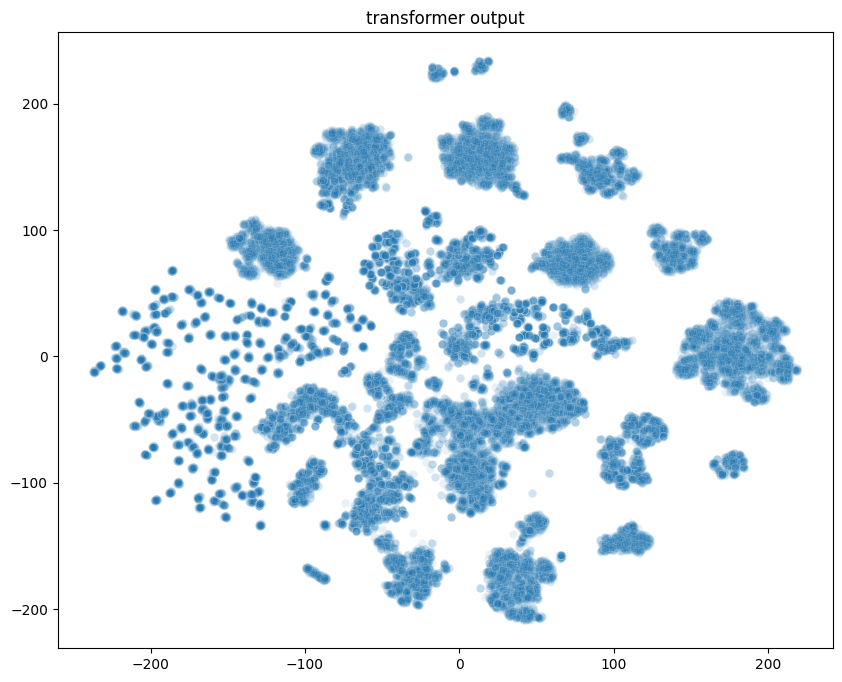

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
x_all = x_tsne[:, 0] #df_tsne['tsne_x'].values
y_all = x_tsne[:, 1] #df_tsne['tsne_y'].values
# cat_all = df_tsne['categ_val'].values
plt.title('transformer output')  #category_name
sns.scatterplot(x=x_all, y=y_all, alpha=0.1, ax=ax, palette=sns.color_palette("bright")) #, hue=cat_all, legend=False)